<a href="https://colab.research.google.com/github/kalaiselvan-t/Deep-Learning/blob/master/Classifying%20movie%20reviews%20(IMDB%20dataset)%20%3A%20Binary%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Classifying Movie Reviews from the IMDB dataset

In [ ]:
'''load the dataset'''

from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) 

In [ ]:
'''
- Know what words correspond to each index
- To visualize the dataset
'''

# train_labels[0]
word_index = imdb.get_word_index()

## Decode Reviews back to English

In [ ]:
'''
- Decode the indexes back to english words
'''

reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])

decoded_review = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

# decoded_review

## Preparing the data

In [ ]:
import numpy as np

# Function to vectorize the input data
def vectorize_sequences(sequences, dimensions=10000):
  results = np.zeros((len(sequences),dimensions))
  for i,sequence in enumerate(sequences):
    results[i,sequence] = 1
  return results

In [ ]:
'''
- Preprocessing the data
- Split the data into training and test sets
'''
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
print('x_train shape: ', x_train.shape)
print('x_test shape: ', x_test.shape)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (25000, 10000)
x_test shape:  (25000, 10000)
y_train shape:  (25000,)
y_test shape:  (25000,)


In [ ]:
x_train[0]
# y_train

array([0., 1., 1., ..., 0., 0., 0.])

## Building the network - Overfitting Demostration

In [ ]:
'''
- Demonstration of overfitting
- Look for peaks in the validation loss around 4 epochs
- That means overfitting
'''

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy',
              metrics=['acc'])

## Setting aside validation data

In [ ]:
'''
- Set aside validation data to monitor the model accuracy
'''
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

## Training the model

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 3s 69ms/step - loss: 0.5362 - acc: 0.7879 - val_loss: 0.4201 - val_acc: 0.8549
Epoch 2/20
30/30 [==============================] - 1s 40ms/step - loss: 0.3441 - acc: 0.8891 - val_loss: 0.3238 - val_acc: 0.8814
Epoch 3/20
30/30 [==============================] - 1s 43ms/step - loss: 0.2576 - acc: 0.9151 - val_loss: 0.2914 - val_acc: 0.8861
Epoch 4/20
30/30 [==============================] - 2s 69ms/step - loss: 0.2109 - acc: 0.9287 - val_loss: 0.2878 - val_acc: 0.8836
Epoch 5/20
30/30 [==============================] - 1s 45ms/step - loss: 0.1763 - acc: 0.9417 - val_loss: 0.2772 - val_acc: 0.8875
Epoch 6/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1527 - acc: 0.9495 - val_loss: 0.2915 - val_acc: 0.8835
Epoch 7/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1305 - acc: 0.9575 - val_loss: 0.2945 - val_acc: 0.8820
Epoch 8/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1133 - a

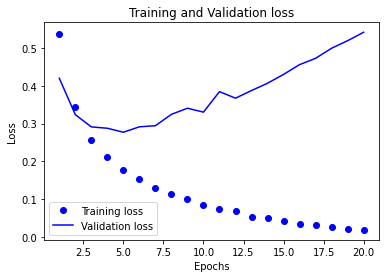

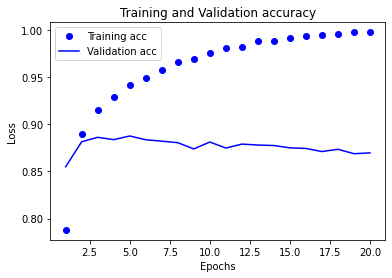

In [ ]:
# Visualizing the loss and accuracy

import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

epochs = range(1,len(acc_values)+1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label="Validation loss")
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
plt.plot(epochs, acc_values, 'bo', label="Training acc")
plt.plot(epochs, val_acc_values, 'b' , label="Validation acc")
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

##Building the Network - Mitigating Overfitting

In [ ]:
'''
- New model to mitigate the overfitting
- Reduce the number of epochs to 4
'''

from keras.engine import input_spec
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=4, batch_size=512)

results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 5s 80ms/step - loss: 0.4483 - accuracy: 0.8164
Epoch 2/4
49/49 [==============================] - 1s 30ms/step - loss: 0.2664 - accuracy: 0.9057
Epoch 3/4
49/49 [==============================] - 1s 30ms/step - loss: 0.2071 - accuracy: 0.9268
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.3473 - accuracy: 0.8631


In [ ]:
print(results)

[0.3472737967967987, 0.8630800247192383]


##Predicting Review on new data with trained model

In [ ]:
model.predict(x_test)

782/782 [==============================] - 3s 3ms/step


array([[0.3029611 ],
       [0.99985576],
       [0.97630805],
       ...,
       [0.17468607],
       [0.16229758],
       [0.8885039 ]], dtype=float32)

##Bridge

#### Future Experiments

1. Modify the number of hidden layers
2. Modify the number of hidden units
3. Use different loss functions
4. Use different activation functions

**Goal:** To increase the accuracy from 88% to 95%(state-of-the-art) or more